<a href="https://colab.research.google.com/github/Annieng184/Annieng184/blob/main/Data_Reporting_with_Pandas_Numpy_and_Matplotlib_June_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import seaborn as sns
import math


In [3]:
#get data files here: https://drive.google.com/drive/folders/1Y2rY-n_iO1dJYcnOgaFhzjPYHr_fD_pD
#merge 12 seperated csv files through terminal on mac
#step 1: Open Terminal. Enter 'pwd'. Hit Enter
#step 2: Type 'cd'. Paste file path "/Users/devin/Desktop/combine". Hit Enter
#step 3: Type "cat *.csv >sales_2019.csv" 


In [4]:
#import file from local drive
from google.colab import files
uploaded = files.upload()

Saving sales_2019.csv to sales_2019.csv


In [5]:
df = pd.read_csv(io.BytesIO(uploaded['sales_2019.csv']))
print(df)
len(df)

       Order ID                   Product Quantity Ordered Price Each  \
0        141234                    iPhone                1        700   
1        141235  Lightning Charging Cable                1      14.95   
2        141236          Wired Headphones                2      11.99   
3        141237          27in FHD Monitor                1     149.99   
4        141238          Wired Headphones                1      11.99   
...         ...                       ...              ...        ...   
186856   259353    AAA Batteries (4-pack)                3       2.99   
186857   259354                    iPhone                1        700   
186858   259355                    iPhone                1        700   
186859   259356    34in Ultrawide Monitor                1     379.99   
186860   259357      USB-C Charging Cable                1      11.95   

            Order Date                         Purchase Address  
0       01/22/19 21:25          944 Walnut St, Boston, MA

186861

In [6]:
#clean and update dataframe
df = df.dropna() #remove empty row in dataframe
len(df)


186316

**#QUESTION 1: WHAT WAS THE BEST MONTH FOR SALES?**


In [7]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [8]:
#add month column
df['Month'] = df['Order Date'].str.slice(0,2,1)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [9]:
#check values of Month column
print(set(df['Month'])) 

{'11', '12', '03', '04', '05', '09', '01', '10', '02', '08', '06', '07', 'Or'}


In [10]:
#get rid of 'Or' value
df = df[df['Month'] != 'Or']

In [11]:
#check current values of Month column
print(set(df['Month'])) 

{'12', '11', '03', '04', '05', '09', '01', '10', '02', '08', '06', '07'}


In [12]:
#create Sales column by multiplying Quantity Ordered and Price Each (make sure both of them converted to int)
print(df['Quantity Ordered'].dtypes)
print(df['Price Each'].dtypes)

object
object


In [13]:
#convert Quantity Ordered and Price Each to int in order to multiplying
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast = 'integer')
df['Price Each'] = pd.to_numeric(df['Price Each'], downcast = 'float')

In [14]:
#double check
print(df['Quantity Ordered'].dtypes)
print(df['Price Each'].dtypes)

int8
float32


In [15]:
#create Sales column by multiplying Quantity Ordered and Price Each
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.000000
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.950000
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.980000
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.990005
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.990000


In [16]:
#move Sales column next to Price Each for better look
moving_column = df.pop('Sales')
df.insert(4, 'Sales', moving_column)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [17]:
#calculate total Sales by Month
df.groupby('Month').sum()['Sales']

Month
01    1822256.75
02    2202022.50
03    2807100.25
04    3390670.25
05    3152606.75
06    2577802.25
07    2647775.75
08    2244467.75
09    2097560.00
10    3736726.75
11    3199603.25
12    4613443.50
Name: Sales, dtype: float32

In [18]:
sales_value = df.groupby('Month').sum()['Sales']


In [19]:
sales_value.max() #find the max values


4613443.5

In [20]:
#styling and make your chart prettier with seaborn
sns.set_theme()

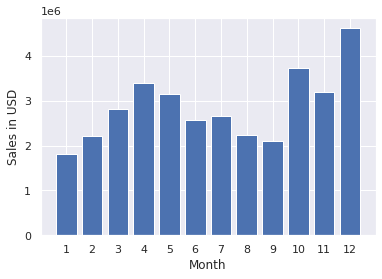

In [21]:
#visualize into chart
months = range(1,13)
plt.bar(x = months, height = sales_value)
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sales in USD')
plt.show()

**#QUESTION 2: WHAT CITY HAS THE BEST VALUE?**

In [22]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [23]:
#split City from Purchase Address
sample_address = '944 Walnut St, Boston, MA 02215	01'

address_to_city = lambda address:address.split(',')[1]


In [24]:
#create new column City with splited value 
df['City'] = df['Purchase Address'].apply(address_to_city)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin


In [25]:
#calculate total sales by city
df.groupby('City').sum()['Sales']

City
 Atlanta          2795498.50
 Austin           1819581.75
 Boston           3661642.00
 Dallas           2767975.50
 Los Angeles      5452571.00
 New York City    4664317.50
 Portland         2320490.50
 San Francisco    8262204.00
 Seattle          2747755.50
Name: Sales, dtype: float32

In [26]:
city_value = df.groupby('City').sum()['Sales']
city_value.max()

8262204.0

In [27]:
cities = []
for city, sales in city_value.items():
  cities.append(city)
print(cities)

[' Atlanta', ' Austin', ' Boston', ' Dallas', ' Los Angeles', ' New York City', ' Portland', ' San Francisco', ' Seattle']


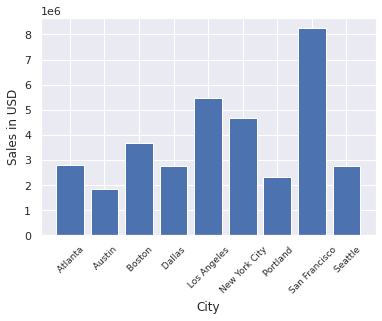

In [28]:
#visualize into chart
plt.bar(x = cities, height = city_value)
plt.xticks(cities, rotation = 45, size = 9)
plt.xlabel('City')
plt.ylabel('Sales in USD')
plt.show()

**#QUESTION 3: WHAT TIME SHOULD WE DISPLAY ADS TO MAXIMIZE THE LIKELIHOOD OF CUSTOMER'S BUYING PRODUCT?**


In [29]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin


In [30]:
#convert Order Date from string type to datetime type 
df['Order Date'] = pd.to_datetime(df['Order Date'])
print(df['Order Date'].dtypes)

datetime64[ns]


In [31]:
#split Hour from Order Date using datetime library
df['Hours'] = df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,141234,iPhone,1,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11


In [32]:
#calculate total sales by hours
df.groupby('Hours').sum()['Sales']

Hours
0     7.137212e+05
1     4.608669e+05
2     2.348514e+05
3     1.457579e+05
4     1.626610e+05
5     2.306798e+05
6     4.481130e+05
7     7.448541e+05
8     1.192349e+06
9     1.639031e+06
10    1.944287e+06
11    2.300610e+06
12    2.316821e+06
13    2.155390e+06
14    2.083673e+06
15    1.941550e+06
16    1.904601e+06
17    2.129362e+06
18    2.219348e+06
19    2.412938e+06
20    2.281716e+06
21    2.042001e+06
22    1.607549e+06
23    1.179304e+06
Name: Sales, dtype: float32

In [33]:
hour_value = df.groupby('Hours').sum()['Sales']
hour_value.nlargest(n=7)

Hours
19    2412938.50
12    2316821.25
11    2300610.25
20    2281716.25
18    2219348.25
13    2155389.75
17    2129361.50
Name: Sales, dtype: float32

In [34]:
hours = []
for hour, sales in hour_value.items():
  hours.append(hour)
print(hours)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


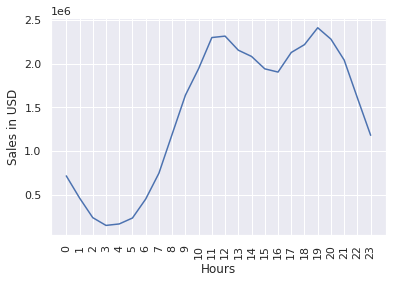

In [35]:
#visualize into chart
plt.plot(hours, hour_value)
plt.xticks(hours, rotation = 90)
plt.xlabel('Hours')
plt.ylabel('Sales in USD')
plt.show()
# We should display ads from 11AM to 1PM or 5PM to 8PM

**#QUESTION 4: WHAT PRODUCTS ARE MOST OFTEM SOLD?**

In [36]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,141234,iPhone,1,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11


In [37]:
#get unique value of Product
print(sorted(df['Product'].unique()))
len(df['Product'].unique())


['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor', '34in Ultrawide Monitor', 'AA Batteries (4-pack)', 'AAA Batteries (4-pack)', 'Apple Airpods Headphones', 'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone', 'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable', 'Macbook Pro Laptop', 'ThinkPad Laptop', 'USB-C Charging Cable', 'Vareebadd Phone', 'Wired Headphones', 'iPhone']


19

In [38]:
#calculate total sales by products
df.groupby('Product').sum()['Sales']

Product
20in Monitor                  4.541487e+05
27in 4K Gaming Monitor        2.435098e+06
27in FHD Monitor              1.132424e+06
34in Ultrawide Monitor        2.355558e+06
AA Batteries (4-pack)         1.061184e+05
AAA Batteries (4-pack)        9.274083e+04
Apple Airpods Headphones      2.349150e+06
Bose SoundSport Headphones    1.345565e+06
Flatscreen TV                 1.445700e+06
Google Phone                  3.319200e+06
LG Dryer                      3.876000e+05
LG Washing Machine            3.996000e+05
Lightning Charging Cable      3.470942e+05
Macbook Pro Laptop            8.037600e+06
ThinkPad Laptop               4.129959e+06
USB-C Charging Cable          2.865012e+05
Vareebadd Phone               8.272000e+05
Wired Headphones              2.464784e+05
iPhone                        4.794300e+06
Name: Sales, dtype: float32

In [39]:
product_value = df.groupby('Product').sum()['Sales']
product_chart = product_value.sort_values(ascending = False)

In [40]:
products = []
for product, sales in product_chart.items():
  products.append(product)
print(products)

['Macbook Pro Laptop', 'iPhone', 'ThinkPad Laptop', 'Google Phone', '27in 4K Gaming Monitor', '34in Ultrawide Monitor', 'Apple Airpods Headphones', 'Flatscreen TV', 'Bose SoundSport Headphones', '27in FHD Monitor', 'Vareebadd Phone', '20in Monitor', 'LG Washing Machine', 'LG Dryer', 'Lightning Charging Cable', 'USB-C Charging Cable', 'Wired Headphones', 'AA Batteries (4-pack)', 'AAA Batteries (4-pack)']


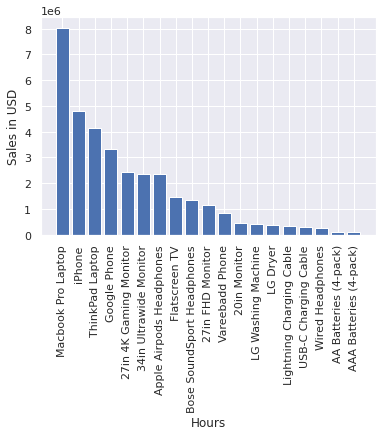

In [41]:
#visualize into chart
plt.bar(products, product_chart)
plt.xticks(products, rotation = 90)
plt.xlabel('Hours')
plt.ylabel('Sales in USD')
plt.show()

**#QUESTION 5: WHAT PRODUCTS ARE MOST OFTEM SOLD TOGETHER?**

In [48]:
#check product with same Order ID
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,141234,iPhone,1,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11


In [49]:
df_dup = df[df['Order ID'].duplicated(keep = False)]
len(df['Order ID'].unique())

178437

In [50]:
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
41,141275,USB-C Charging Cable,1,11.95,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16
42,141275,Wired Headphones,1,11.99,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16
57,141290,Apple Airpods Headphones,1,150.00,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8
58,141290,AA Batteries (4-pack),3,3.84,11.52,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8
133,141365,Vareebadd Phone,1,400.00,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,New York City,11


In [54]:
#combine multiple rows into 1 row
group_product = lambda product: ','.join(product)     

In [53]:
df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(group_product)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours,All Products
41,141275,USB-C Charging Cable,1,11.95,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16,"USB-C Charging Cable,Wired Headphones"
42,141275,Wired Headphones,1,11.99,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16,"USB-C Charging Cable,Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8,"Apple Airpods Headphones,AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,11.52,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,New York City,11,"Vareebadd Phone,Wired Headphones"


In [58]:
#display 2-3 necessary columns and drop duplicates
df_dup = df_dup[['Order ID', 'All Products']].drop_duplicates()
df_dup

,Order ID,All Products
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
186792,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186794,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186802,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186814,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [59]:
#count values
df_dup['All Products'].value_counts().head(10)

iPhone,Lightning Charging Cable                       882
Google Phone,USB-C Charging Cable                     856
iPhone,Wired Headphones                               361
Vareebadd Phone,USB-C Charging Cable                  312
Google Phone,Wired Headphones                         303
iPhone,Apple Airpods Headphones                       286
Google Phone,Bose SoundSport Headphones               161
Vareebadd Phone,Wired Headphones                      104
Google Phone,USB-C Charging Cable,Wired Headphones     77
Vareebadd Phone,Bose SoundSport Headphones             60
Name: All Products, dtype: int64

*Assembling multiple products or services to sell in a package not only increases your overall sales but it also… Gives you the ability to sell slow moving merchandise. Automatically upsells your customers without having to ask for it.*

**#QUESTION 6: WHAT PRODUCTS SOLD THE MOST? WHY DO YOU THINK IT SOLD THE MOST?**

In [60]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,141234,iPhone,1,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11


In [61]:
#get unique value of Product
print(sorted(df['Product'].unique()))
len(df['Product'].unique())

['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor', '34in Ultrawide Monitor', 'AA Batteries (4-pack)', 'AAA Batteries (4-pack)', 'Apple Airpods Headphones', 'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone', 'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable', 'Macbook Pro Laptop', 'ThinkPad Laptop', 'USB-C Charging Cable', 'Vareebadd Phone', 'Wired Headphones', 'iPhone']


19

In [89]:
#calculate total Quantity Ordered by Products
df.groupby('Product').sum()['Quantity Ordered']

Product
20in Monitor                   4129.0
27in 4K Gaming Monitor         6244.0
27in FHD Monitor               7550.0
34in Ultrawide Monitor         6199.0
AA Batteries (4-pack)         27635.0
AAA Batteries (4-pack)        31017.0
Apple Airpods Headphones      15661.0
Bose SoundSport Headphones    13457.0
Flatscreen TV                  4819.0
Google Phone                   5532.0
LG Dryer                        646.0
LG Washing Machine              666.0
Lightning Charging Cable      23217.0
Macbook Pro Laptop             4728.0
ThinkPad Laptop                4130.0
USB-C Charging Cable          23975.0
Vareebadd Phone                2068.0
Wired Headphones              20557.0
iPhone                         6849.0
Name: Quantity Ordered, dtype: float64

In [90]:
quantity_count = df.groupby('Product').sum()['Quantity Ordered']

In [125]:
#sort values in ascending order in Pandas
quantity_chart = quantity_count.sort_values(ascending = True)
quantity_chart

Product
LG Dryer                        646.0
LG Washing Machine              666.0
Vareebadd Phone                2068.0
20in Monitor                   4129.0
ThinkPad Laptop                4130.0
Macbook Pro Laptop             4728.0
Flatscreen TV                  4819.0
Google Phone                   5532.0
34in Ultrawide Monitor         6199.0
27in 4K Gaming Monitor         6244.0
iPhone                         6849.0
27in FHD Monitor               7550.0
Bose SoundSport Headphones    13457.0
Apple Airpods Headphones      15661.0
Wired Headphones              20557.0
Lightning Charging Cable      23217.0
USB-C Charging Cable          23975.0
AA Batteries (4-pack)         27635.0
AAA Batteries (4-pack)        31017.0
Name: Quantity Ordered, dtype: float64

In [126]:
quantities = []
for quantity, product in quantity_chart.items():
  quantities.append(product)
print(quantities)

[646.0, 666.0, 2068.0, 4129.0, 4130.0, 4728.0, 4819.0, 5532.0, 6199.0, 6244.0, 6849.0, 7550.0, 13457.0, 15661.0, 20557.0, 23217.0, 23975.0, 27635.0, 31017.0]


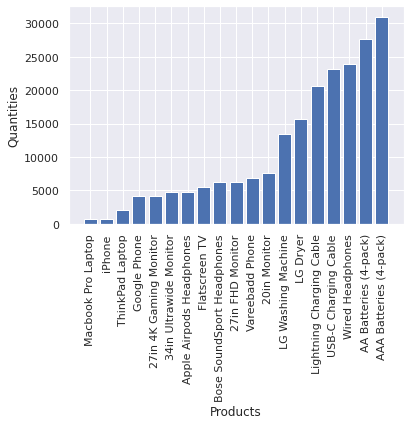

In [127]:
#visualize into chart
plt.bar(products, height = quantity_chart)
plt.xticks(products, rotation = 90)
plt.xlabel('Products')
plt.ylabel('Quantities')
plt.show()